<h1><center>Statistical Analysis on Contraceptive Methods Used</center></h1>

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.stats.multicomp as mc

In [2]:
df=pd.read_csv('cmc.data')
df.head()

,Wife's age,Wife's education,Husband's education,Number of children,Wife's religion,Wife's now working?,Husband's occupation,Standard-of-living index,Media exposure,Contraceptive method
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [3]:
#Rows and columns
df.shape

(1473, 10)

In [4]:
#Checking for null values in each columns
df.isnull().sum()

Wife's age                  0
Wife's education            0
Husband's education         0
Number of children          0
Wife's religion             0
Wife's now working?         0
Husband's occupation        0
Standard-of-living index    0
Media exposure              0
Contraceptive method        0
dtype: int64

In [5]:
# Converting categorical columns to object type
df["Wife's education"]=df["Wife's education"].astype('object')
df["Husband's education"]=df["Husband's education"].astype('object')
df["Wife's religion"]=df["Wife's religion"].astype('object')
df["Wife's now working?"]=df["Wife's now working?"].astype('object')
df["Husband's occupation"]=df["Husband's occupation"].astype('object')
df["Standard-of-living index"]=df["Standard-of-living index"].astype('object')
df["Media exposure"]=df["Media exposure"].astype('object')
df["Contraceptive method"]=df["Contraceptive method"].astype('object')

In [6]:
#Checking the data type of each column
df.dtypes

Wife's age                   int64
Wife's education            object
Husband's education         object
Number of children           int64
Wife's religion             object
Wife's now working?         object
Husband's occupation        object
Standard-of-living index    object
Media exposure              object
Contraceptive method        object
dtype: object

In [7]:
#Numerical columns
data_num=df.iloc[:,[0,3]]
data_num.head()

,Wife's age,Number of children
0,24,3
1,45,10
2,43,7
3,42,9
4,36,8


In [8]:
#Description of numerical columns
data_num.describe()

,Wife's age,Number of children
count,1473.000000,1473.000000
mean,32.538357,3.261371
std,8.227245,2.358549
min,16.000000,0.000000
25%,26.000000,1.000000
50%,32.000000,3.000000
75%,39.000000,4.000000
max,49.000000,16.000000


## Descriptive Statistics

### Measures of Central Tendency

In [9]:

data_num.mean()

Wife's age            32.538357
Number of children     3.261371
dtype: float64

In [10]:
data_num.median()

Wife's age            32.0
Number of children     3.0
dtype: float64

The mean and median are approximately the same

In [11]:
data_num.mode()

,Wife's age,Number of children
0,25.0,1
1,NaN,2


25 is the value with highest frequency for Wife's age and Number of children has no mode value

### Measures of Dispersion

In [12]:
data_num.var()

Wife's age            67.687556
Number of children     5.562753
dtype: float64

In [13]:
data_num.std()

Wife's age            8.227245
Number of children    2.358549
dtype: float64

The values in Wife's age is more dispersed from the mean as compared to the values in Number of Children

In [14]:
mean=data_num.mean()
from scipy.stats import trim_mean
trimmed_mean=list(trim_mean(data_num, proportiontocut = 0.01))
pd.DataFrame({'mean':mean,'trimmed_mean':trimmed_mean})

,mean,trimmed_mean
Wife's age,32.538357,32.529412
Number of children,3.261371,3.208997


The difference in mean and trimmed mean means there is a presence of outliers

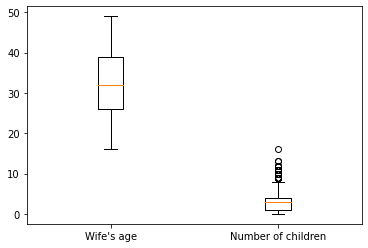

In [15]:
plt.boxplot([data_num["Wife's age"],data_num["Number of children"]])
plt.xticks([1,2],["Wife's age","Number of children"])
plt.show()

In [16]:
#Checking for outliers using IQR
q1=df['Number of children'].quantile(0.25)
q3=df['Number of children'].quantile(0.75)
IQR=q3-q1
outliers=[]
lower_bound=q1-(1.5*IQR)
higher_bound=q3+(1.5*IQR)
for i in df['Number of children']:
    if i<lower_bound:
        outliers.append(i)    
for i in df['Number of children']:
    if i>higher_bound:
        outliers.append(i) 
print(outliers)

[10, 9, 9, 10, 10, 10, 12, 11, 11, 11, 10, 9, 10, 11, 13, 11, 10, 16, 13, 11, 9, 9, 9, 11, 9, 11, 12, 10, 9, 11, 9, 10, 11, 12, 12, 10, 10, 9, 9, 9, 9, 9, 11, 9, 9]


### Distribution Of Data

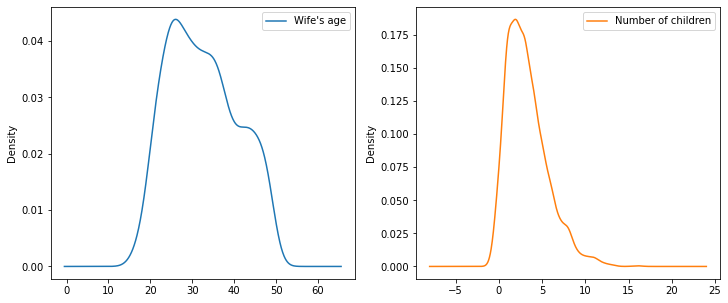

In [17]:
data_num.plot(kind='density',subplots=True,sharex=False,layout=(1,2),figsize=(12,5))
plt.show()

### Skewness and Kurtosis

In [18]:
data_num.skew()

Wife's age            0.256449
Number of children    1.099014
dtype: float64

Since the skewness of Wife's age is around zero is is considered to be almost normal where as the Number of children column has a skewness higher than zero and so it has a positive skew

In [19]:
data_num.kurt()

Wife's age           -0.943894
Number of children    1.529607
dtype: float64

The kurtosis of Wife's age is negative and so it is platykurtic and the kurtosis of number of children is positive and so it is leptokurtic

### Correlation and Covariance

In [20]:
df.corr()

,Wife's age,Number of children
Wife's age,1.000000,0.540126
Number of children,0.540126,1.000000


The two columns seems to have a correlation between them

# Hypothesis Testing

In [21]:
df.columns

Index(['Wife's age', 'Wife's education', 'Husband's education',
       'Number of children', 'Wife's religion', 'Wife's now working?',
       'Husband's occupation', 'Standard-of-living index', 'Media exposure',
       'Contraceptive method'],
      dtype='object')

# One way Anova

## 1. Checking that the mean age of women using each type of contraceptive method is the same or different

In [22]:
df1=df[["Contraceptive method","Wife's age"]]
df1.head()

,Contraceptive method,Wife's age
0,1,24
1,1,45
2,1,43
3,1,42
4,1,36


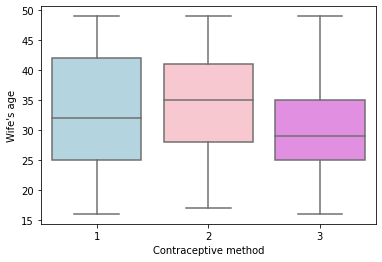

In [23]:
ax=sns.boxplot(df1["Contraceptive method"],df1["Wife's age"],palette=['lightblue','pink','violet'])

In [24]:
#Sample of n=50
dtype1=df1[df1["Contraceptive method"]==1].sample(50,random_state=2)
dtype2=df1[df1["Contraceptive method"]==2].sample(50,random_state=2)
dtype3=df1[df1["Contraceptive method"]==3].sample(50,random_state=10)


In [25]:
# Checking for normality of data at 95% confidence level
print(stats.shapiro(dtype1["Wife's age"]))
print(stats.shapiro(dtype2["Wife's age"]))
print(stats.shapiro(dtype3["Wife's age"]))

ShapiroResult(statistic=0.9571387767791748, pvalue=0.0674646720290184)
ShapiroResult(statistic=0.9787477254867554, pvalue=0.5004413723945618)
ShapiroResult(statistic=0.9690860509872437, pvalue=0.21241095662117004)


#### Since p-value is greater 0.05 level of significance we have enough evidence to conclude that the data is normally distributed.

In [26]:
stats.levene(dtype1["Wife's age"],dtype2["Wife's age"],dtype3["Wife's age"])

LeveneResult(statistic=2.878860626128838, pvalue=0.059373277092232724)

#### Since p_value is greater than 0.05 level of significance we have enough evidence to conclude that the data has equal variance

### 𝐻0 :   The mean age of women using each type of contraceptive method is the same
### 𝐻𝐴 : At least one of the mean  age of women using each type of contraceptive method is the different.  

### Significance level= 5%

In [27]:
#Calculating Critical value :where dfn=3-1=2 ;dfd=50-3=47
crit_val = stats.f.isf(0.05, dfn = 2, dfd = 47)
print("F critical value for 2 and 47 df with 95% confidence:",crit_val)

F critical value for 2 and 47 df with 95% confidence: 3.195056280737215


In [28]:
#Calculating f_statistic and p-value:
f_stat, p_val = stats.f_oneway(dtype1["Wife's age"],dtype2["Wife's age"],dtype3["Wife's age"])
print("F statistic:",f_stat)

F statistic: 4.720896873238956


#### Since f statistic is greater than F critical value for 2 and 47 df with 95% confidence it falls in the rejection region and so we reject the null hypothesis and coclude that the mean age of women using each type of contraceptive method is the different

In [29]:
#Calculating p-value
p_val

0.010301352958241352

#### Since p-value is less than 5% significance level  it falls in the rejection region and so we reject the null hypothesis and coclude that the mean age of women using each type of contraceptive method is the different

# Post Hoc Analysis

In [30]:
comp = mc.MultiComparison(data = df1["Wife's age"], groups = df1['Contraceptive method'])

# tukey's range test
post_hoc = comp.tukeyhsd()

# print the summary table
post_hoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,0.9599,0.1841,-0.3204,2.2402,False
1,3,-3.1799,0.001,-4.305,-2.0548,True
2,3,-4.1398,0.001,-5.4703,-2.8093,True


#### The reject=False for pair (1,2) denotes that we fail to reject the null hypothesis; and conclude that the mean age of women using  type 1 and type 2 of contraceptive method is the same

#### For the pairs (1,3) and (2,3) the mean age of women is not the same

# Wilcoxon Rank Sum Test

## 2. As per wikipedia,the number of childern born to wife's from Islamic religion is greater than Non-Islamic religion

In [31]:
df2=df[["Wife's religion","Number of children"]]
df2.head()

,Wife's religion,Number of children
0,1,3
1,1,10
2,1,7
3,1,9
4,1,8


In [32]:
d1=df2[df2["Wife's religion"]==0]
d2=df2[df2["Wife's religion"]==1]

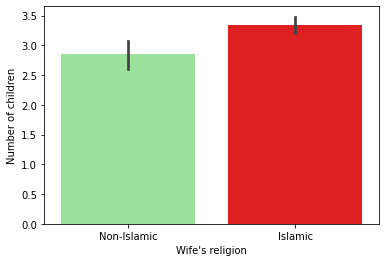

In [33]:
ax=sns.barplot(df2["Wife's religion"],df2["Number of children"],palette=['lightgreen','red'])
ax.set_xticklabels(["Non-Islamic","Islamic"])
plt.show()

In [34]:
# Checking for normality of data at 95% confidence level
dtype1=df2[df2["Wife's religion"]==0].sample(50,random_state=1)
dtype2=df2[df2["Wife's religion"]==1].sample(50,random_state=1)
print(stats.shapiro(dtype1["Number of children"]))
print(stats.shapiro(dtype2["Number of children"]))


ShapiroResult(statistic=0.9102634787559509, pvalue=0.0010675521334633231)
ShapiroResult(statistic=0.9212841987609863, pvalue=0.0026246863417327404)


#### Since both the p-values are less than 5% significance level we conclude that the data is not normal

#### And so we opt for a Non-parametric test

### 𝐻0 :The average number of children from Islamic religion is less than or equal to Non-Islamic religion
### 𝐻𝐴 : The average number of children is greater for Islamic religion than Non-Islamic religion

In [35]:
#Calculating Critical value
z_val = np.abs(round(stats.norm.isf(q = 0.05), 2))

print('Critical value for one-tailed Z-test:', z_val)

Critical value for one-tailed Z-test: 1.64


In [36]:
test_stat, p_value = stats.ranksums(d1["Number of children"], d2["Number of children"])
test_stat

-1.8637367190753549

### Since test statistic is greater than critical value with 95% confidence it falls in the rejection region and so we reject the null hypothesis and coclude that the number of childern born to wife's from Islamic religion is greater than Non-Islamic religion 

# Two Way Anova

## 3. Check if there is any effect of  education levels of the wife and  media exposure level on the total number of children

In [37]:
df_40=df[["Wife's education","Media exposure","Number of children"]].rename(columns={"Wife's education":"Wife education","Number of children":"Number_of_children"}).sample(40,random_state=1)
df_40.head()

,Wife education,Media exposure,Number_of_children
1126,4,0,2
390,4,0,0
824,3,0,5
341,3,0,8
1213,4,0,0


In [38]:
# Checking for normality of data at 90% confidence level
stats.shapiro(df_40["Number_of_children"])


ShapiroResult(statistic=0.9312178492546082, pvalue=0.0176526065915823)

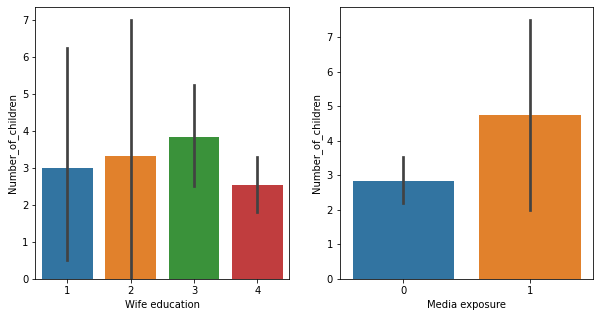

In [39]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(df_40["Wife education"],df_40["Number_of_children"])
plt.subplot(1,2,2)
sns.barplot(df_40["Media exposure"],df_40["Number_of_children"])
plt.show()

#### Since  all the p-values are greater 0.01 level of significance we have enough evidence to conclude that the data is normally distributed.

## The null and alternative hypothesis for the level of education of the wife is:

#### H0: The average number of children  for all the education levels of the wife is same
#### H1: At least one education levels of the wife has a different average number of children

## The null and alternative hypothesis for media exposure is:

#### H0: The average number of children  for all the media exposure level is the same
#### H1: At least one media exposure level has a different average number of children

In [40]:
# obtain number of unique education levels (treatments)
t = df_40["Wife education"].nunique()
print('t:', t)

# obtain number of unique test preparation course levels (blocks)
b = df_40['Media exposure'].nunique()
print('b:', b)

# calculate the number of students in each education level
# consider the total number of students in all education levels
N = df_40['Number_of_children'].value_counts().sum()
print('N:', N)

t: 4
b: 2
N: 40


#### For ⍺ = 0.01 and degrees of freedom for treatment  𝑑𝑓𝑇𝑟  (= t-1, (t-1)(b-1)) = (3, 3), calculate the critical value.

In [41]:
f = np.abs(round(stats.f.isf(q = 0.01, dfn = 3, dfd = 3), 4))
print('Critical value for F-test:', f)

Critical value for F-test: 29.4567


#### For ⍺ = 0.01 and degrees of freedom for block $df_{B}$ (= b-1, (t-1)(b-1)) = (1, 3), calculate the critical value.

In [42]:
f = np.abs(round(stats.f.isf(q = 0.01, dfn = 1, dfd = 3), 4))
print('Critical value for F-test:', f)

Critical value for F-test: 34.1162


In [43]:
test = ols('Number_of_children ~ Q("Wife education") + Q("Media exposure")', df_40).fit()

# create table for 2-way ANOVA test
# pass the linear model 'test'
# 'typ = 2' performs two-way ANOVA
anova_2 = anova_lm(test, typ = 2)

# print the table
anova_2

,sum_sq,df,F,PR(>F)
"Q(""Wife education"")",31.551120,3.0,2.483800,0.076862
"Q(""Media exposure"")",31.372549,1.0,7.409228,0.010045
Residual,148.198880,35.0,NaN,NaN


 The above output shows that the test statistic for treatments (i.e. wife's education) is less than Critical value for F-test: 29.4567 and the p-value is greater than 0.01. Thus we fail to reject (i.e. accept) the null hypothesis for treatments and conclude that average number of children for all the education levels of the wife is same

The test statistic for blocks (i.e.Media exposure)  is less than Critical value for F-test: 34.1162 and the p-value is greater than 0.01. Thus we fail to reject (i.e. accept) the null hypothesis for blocks and conclude that  average number of children for all the media exposure level is the same

# Pearsons Correlation Coefficient

## 4.To check if number of children depends on wife's age

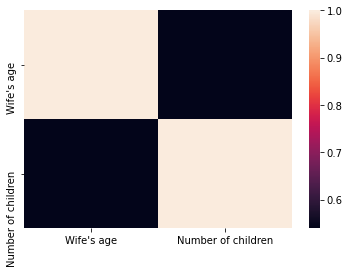

In [44]:
sns.heatmap(df.corr())
plt.show()

As per the heatmap the two features are correlated

In [45]:
#Sample of n=50
df4=df[["Wife's age","Number of children"]].sample(50,random_state=1)
df4.head()

,Wife's age,Number of children
1126,31,2
390,33,0
824,29,5
341,42,8
1213,31,0


### H0: Number of Children is not denpendent on Wife's age
### H1:Number of Children is dependent on Wife's age

In [46]:
stat,p_val=stats.pearsonr(df4["Wife's age"],df4["Number of children"])
print("P_value:",p_val)

P_value: 0.013778458489612956


Since the p_value is less that the significance level of 0.05 it falls in the rejection region and so we reject the null hypothesis and conclude that the number of Children is dependent on Wife's age with 95% confidence 

# Chi-square test

### 5.Does the choice of contraceptive method depend on media exposure or not

In [47]:
df5=pd.crosstab(df["Media exposure"],df["Contraceptive method"])
df5

Contraceptive method,1,2,3
Media exposure,,,
0,555,323,486
1,74,10,25


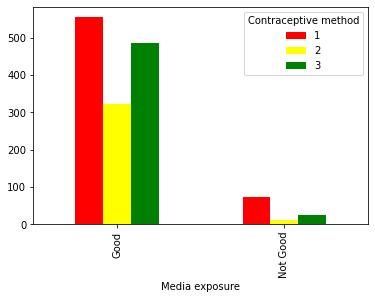

In [66]:
df5.plot(kind="bar",color=['red','yellow','green'])
plt.xticks([0,1],['Good','Not Good'])
plt.show()

### H0:Contraceptive method used is independent of media exposure
### H1:Contraceptive method used is not independent of media exposure

In [63]:
observed_val=df5.values
observed_val

array([[555, 323, 486],
       [ 74,  10,  25]], dtype=int64)

In [65]:
 #Calculating critical value with 95% confidence level
crit_val=stats.chi2.isf(0.05,df=2)
print("Critical value:",crit_val)
#Calculating test statistic
test_stat, p, dof, expected_value = stats.chi2_contingency(observed = observed_val, correction = False)
print("Test statistic:", test_stat)

Critical value: 5.991464547107983
Test statistic: 31.572283442858545


Since the test statistic is much greater than critical value it falls in rejection region and so we reject null hypothesis and conclude that the contraceptive method used is not independent of media exposure with 95% confidence which means the frequency of people using a particular contraceptive increases with respect to type of media exposure